#### store_id : 각 파일에서의 상점 고유 번호.
#### date : 거래 일자
#### time : 거래 시간
#### card_id : 카드 번호의 hash 값
#### amount : 매출액, 0보다 작은 음수는 거래 취소(환불), 단위 krw 아님, 할부개월수만큼 amount들어옴
#### installments : 할부개월수. 일시불은 빈 문자열
#### days_of_week : 요일, 월요일이 0, 일요일은 6
#### holyday : 1이면 공휴일, 0이면 공휴일 아님

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('font', family='AppleGothic')
import seaborn as sns

## 1. Load dataSet

In [9]:
train = pd.read_csv("./train.csv", parse_dates=["date"])
print(train.shape)

(3362796, 8)


In [15]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,date-year,date-month,date-day,datetime
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016,12,14,2016-12-14 18:05:31
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016,12,14,2016-12-14 18:05:54
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016,12,19,2016-12-19 12:42:31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016,12,19,2016-12-19 12:48:08
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016,12,19,2016-12-19 13:31:08


In [21]:
train.describe()

,store_id,amount,installments,days_of_week,holyday,date-year,date-month,date-day,hour,minute,second
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02,2.017248e+03,6.327452e+00,1.582590e+01,1.535103e+01,2.951374e+01,2.949720e+01
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01,6.764471e-01,3.333864e+00,8.786954e+00,5.191531e+00,1.731957e+01,1.732404e+01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00,2.017000e+03,4.000000e+00,8.000000e+00,1.200000e+01,1.500000e+01,1.400000e+01
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00,2.017000e+03,6.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,2.900000e+01
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00,2.018000e+03,9.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,4.500000e+01
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00,2.018000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


## 2. Preprocess

### 2-1. parse date, time
#### date와 time column을 이용해 year, month, day, hour, minute, second column을 생성합니다

In [ ]:
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day

In [18]:
train2 = pd.read_csv("./train.csv", parse_dates=["time"])
train2["hour"] = train2["time"].dt.hour
train2["minute"] = train2["time"].dt.minute
train2["second"] = train2["time"].dt.second

In [20]:
train["hour"] = train2["hour"]
train["minute"] = train2["minute"]
train["second"] = train2["second"]
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,date-year,date-month,date-day,datetime,hour,minute,second
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016,12,14,2016-12-14 18:05:31,18,5,31
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016,12,14,2016-12-14 18:05:54,18,5,54
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016,12,19,2016-12-19 12:42:31,12,42,31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016,12,19,2016-12-19 12:48:08,12,48,8
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016,12,19,2016-12-19 13:31:08,13,31,8


In [55]:
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,date-year,date-month,date-day,datetime,hour,minute,second,total,temp
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,2016,12,14,2016-12-14 18:05:31,18,5,31,5.0,1
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,2016,12,14,2016-12-14 18:05:54,18,5,54,-5.0,1
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,2016,12,19,2016-12-19 12:42:31,12,42,31,144.0,1
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,2016,12,19,2016-12-19 12:48:08,12,48,8,66.0,1
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,2016,12,19,2016-12-19 13:31:08,13,31,8,24.0,1
5,0,2016-12-19,13:36:39,30b1422f77,44,1.0,0,0,2016,12,19,2016-12-19 13:36:39,13,36,39,44.0,1
6,0,2016-12-19,14:00:23,6dd8dad5ab,146,1.0,0,0,2016,12,19,2016-12-19 14:00:23,14,0,23,146.0,1
7,0,2016-12-19,14:01:36,a4a425c5d2,6,1.0,0,0,2016,12,19,2016-12-19 14:01:36,14,1,36,6.0,1
8,0,2016-12-19,14:09:46,f213c011fe,306,1.0,0,0,2016,12,19,2016-12-19 14:09:46,14,9,46,306.0,1
9,0,2016-12-19,14:13:02,a185b7b11f,51,1.0,0,0,2016,12,19,2016-12-19 14:13:02,14,13,2,51.0,1


In [56]:
train.loc[train["amount"] != train["total"]]

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,date-year,date-month,date-day,datetime,hour,minute,second,total,temp
152,0,2016-12-21,10:48:04,65d5e33f69,445,3.0,2,0,2016,12,21,2016-12-21 10:48:04,10,48,4,1335.0,1
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0,2016,12,21,2016-12-21 11:16:17,11,16,17,-1335.0,1
206,0,2016-12-21,14:26:24,4a8e737d2c,277,2.0,2,0,2016,12,21,2016-12-21 14:26:24,14,26,24,554.0,1
311,0,2016-12-21,22:17:30,3f59e8684b,375,3.0,2,0,2016,12,21,2016-12-21 22:17:30,22,17,30,1125.0,1
651,0,2016-12-24,11:59:37,583d5dd51c,408,3.0,5,0,2016,12,24,2016-12-24 11:59:37,11,59,37,1224.0,1
689,0,2016-12-24,17:56:05,27822a80ea,553,3.0,5,0,2016,12,24,2016-12-24 17:56:05,17,56,5,1659.0,1
787,0,2016-12-25,09:13:22,631e51fc9b,284,2.0,6,1,2016,12,25,2016-12-25 09:13:22,9,13,22,568.0,1
820,0,2016-12-25,13:46:11,f43931314a,389,3.0,6,1,2016,12,25,2016-12-25 13:46:11,13,46,11,1167.0,1
878,0,2016-12-25,17:39:20,ebd094203a,266,3.0,6,1,2016,12,25,2016-12-25 17:39:20,17,39,20,798.0,1
887,0,2016-12-25,18:20:29,66fe71edb4,553,3.0,6,1,2016,12,25,2016-12-25 18:20:29,18,20,29,1659.0,1


In [79]:
train_over = train.loc[train["total"] >= 10000]

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


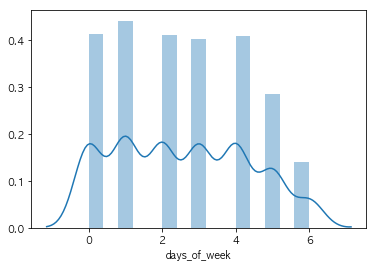

In [81]:
sns.distplot(train_over["days_of_week"])

In [75]:
train2 = train.loc[(train["total"] <= 1000) & (train["total"] >= 0)]

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


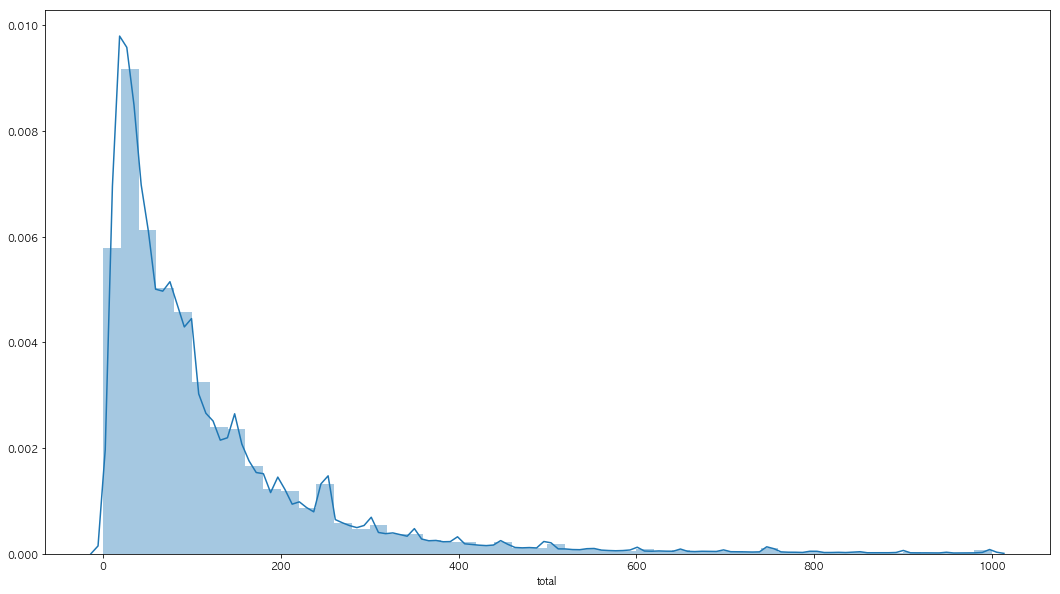

In [76]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 10)
sns.distplot(train2["total"])

### 2-2. Fill in null data
#### null data를 찾아 채워 넣습니다

In [23]:
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
date-year             0
date-month            0
date-day              0
datetime              0
hour                  0
minute                0
second                0
dtype: int64

In [32]:
train.loc[train["installments"].isnull(), "installments"] = 1

In [25]:
train.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
date-year       0
date-month      0
date-day        0
datetime        0
hour            0
minute          0
second          0
dtype: int64

#### intstallments의 null값은 일시불을 의미하기 때문에, 분할 값 0으로 모두 채웠습니다

### 2-3. total
#### total = amount * installments
#### total은 총 금액을 나타나내는 column

In [36]:
train["total"] = train["amount"] * train["installments"]

## 3. Data Analysis

### 3-1. store_id

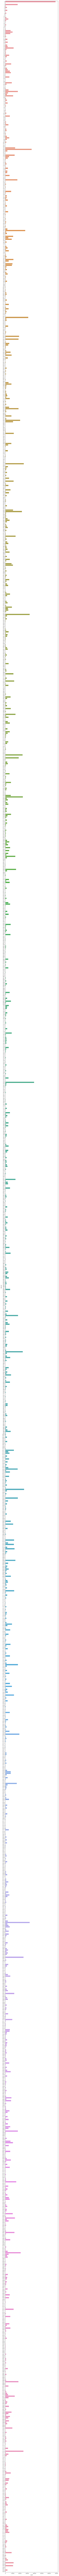

In [41]:

figure, ax = plt.subplots()
figure.set_size_inches(10, 500)
sns.countplot(data=train, y="store_id")

In [ ]:
pd.pivot_table(train, index="Pclass", values="Survived")

In [28]:
train.tail()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,date-year,date-month,date-day,datetime,hour,minute,second
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,0.0,3,0,2018,7,19,2018-07-19 17:58:31,17,58,31
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,0.0,3,0,2018,7,19,2018-07-19 18:54:34,18,54,34
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,0.0,6,0,2018,7,22,2018-07-22 14:46:57,14,46,57
3362794,1799,2018-07-25,18:09:13,57932602d6,300,0.0,2,0,2018,7,25,2018-07-25 18:09:13,18,9,13
3362795,1799,2018-07-30,10:58:53,42d354807a,325,0.0,0,0,2018,7,30,2018-07-30 10:58:53,10,58,53


In [38]:
pd.pivot_table(train, index="store_id", values="count")

KeyError: 'count'

In [42]:
train["temp"] = 1

/Users/PJS/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


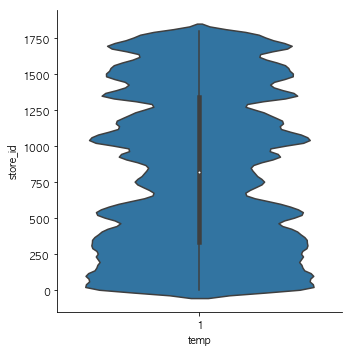

In [44]:
sns.factorplot(data=train, x="temp", y="store_id", kind="violin")

In [ ]:
sns.catplot(data=train, x="temp", y="store_id", kind="violin")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


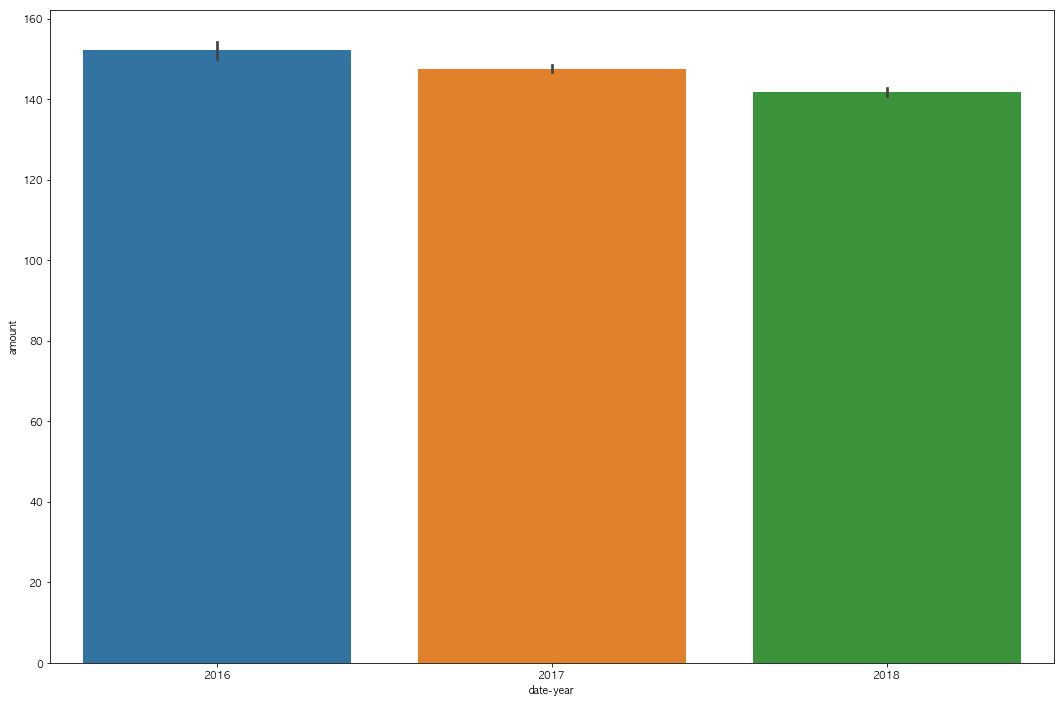

In [49]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 12)
sns.barplot(data=train, x="date-year", y="amount")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


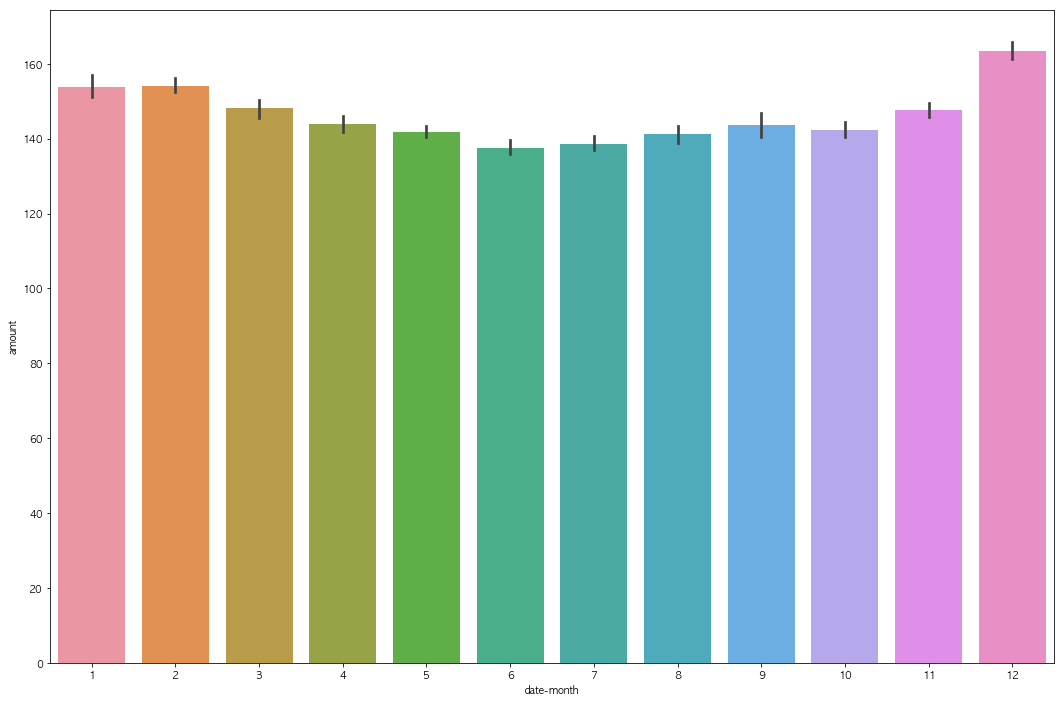

In [50]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 12)
sns.barplot(data=train, x="date-month", y="amount")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


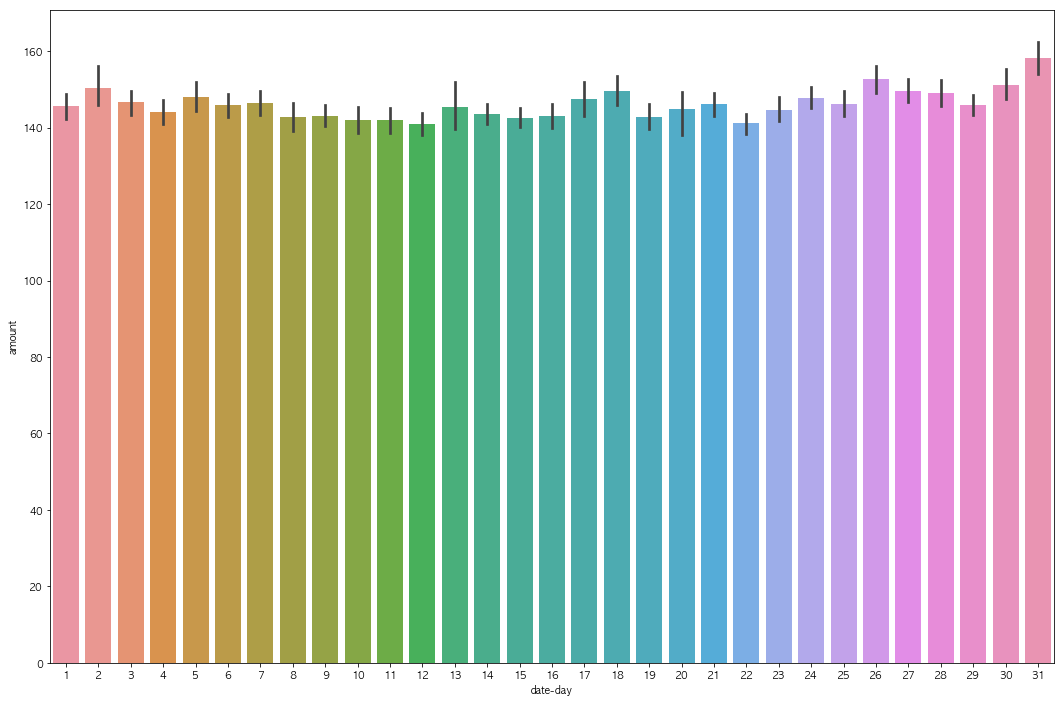

In [52]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 12)
sns.barplot(data=train, x="date-day", y="amount")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


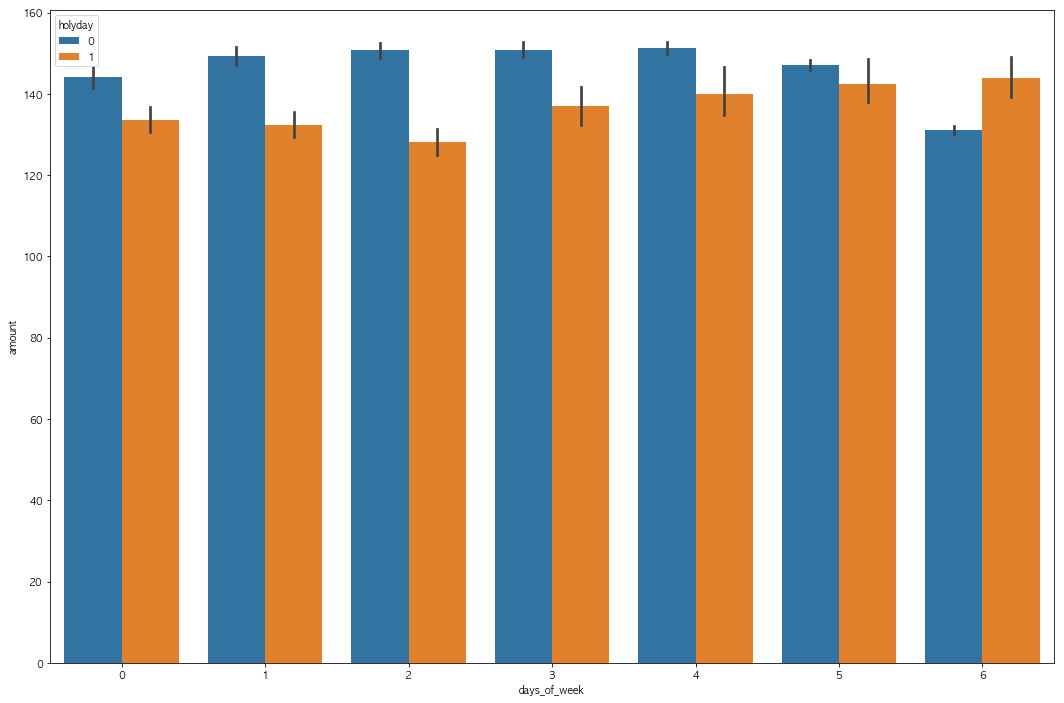

In [77]:
sns.barplot(data=train, x="days_of_week", y="amount", hue="holyday")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


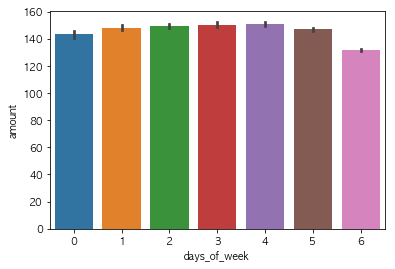

In [78]:
sns.barplot(data=train, x="days_of_week", y="amount")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


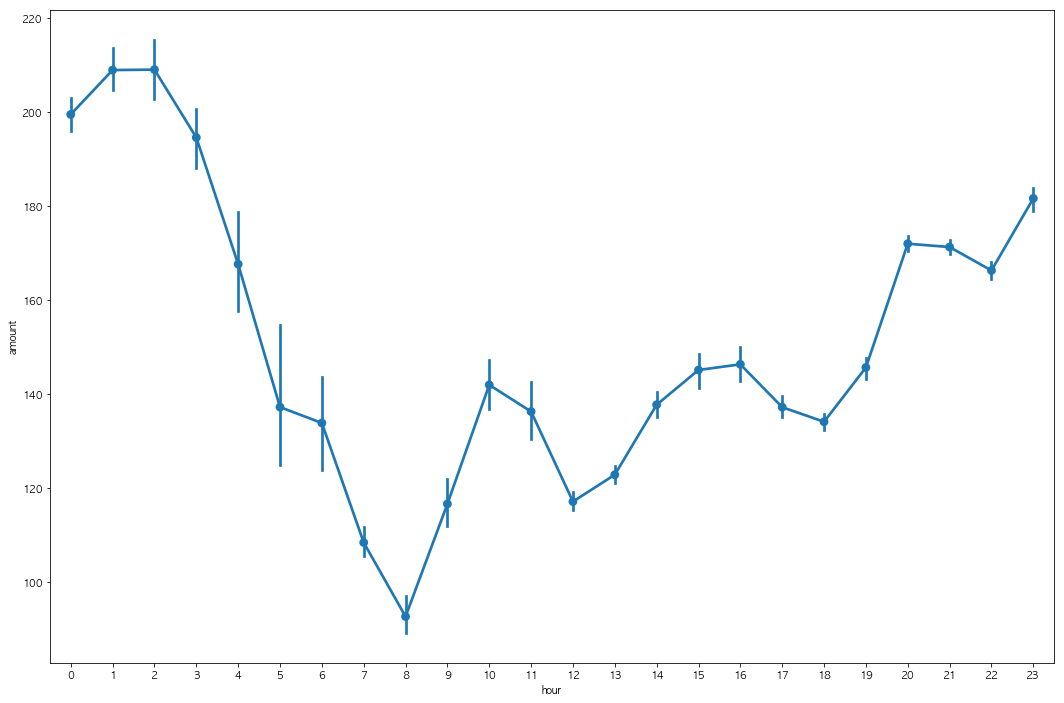

In [46]:
figure, ax = plt.subplots()

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="hour", y="amount")

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


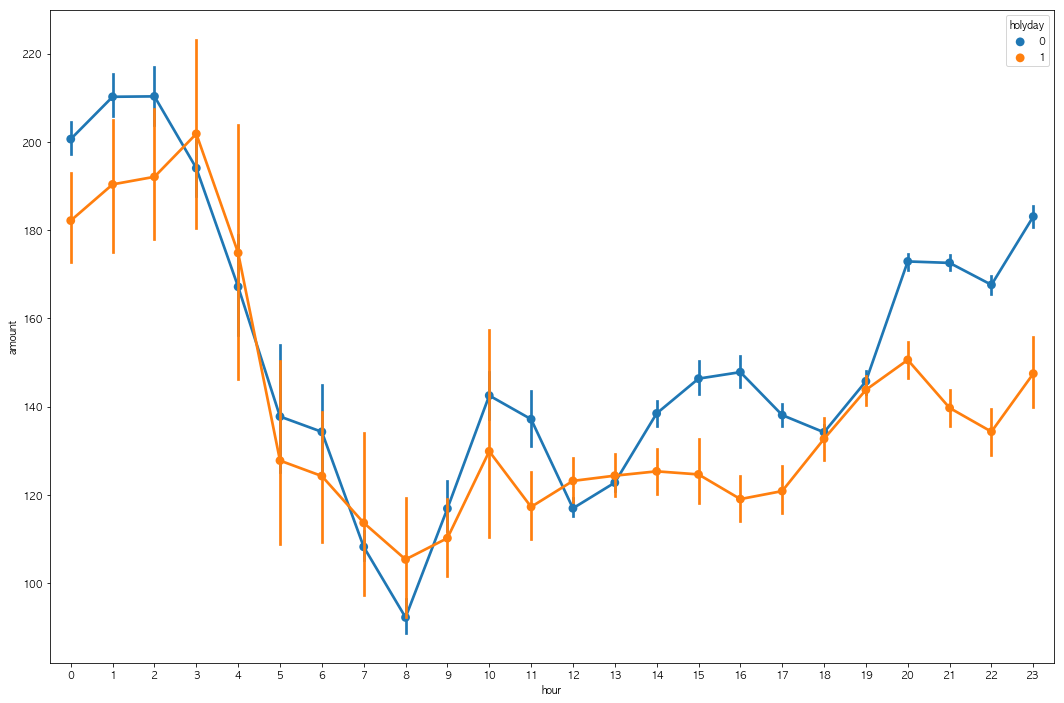

In [54]:
figure, ax = plt.subplots()

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="hour", y="amount", hue="holyday")

In [ ]:
#### 대부분의 시간대에서 공휴일이 아닌 경우에 amount가 높다. 이는 

/Users/PJS/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


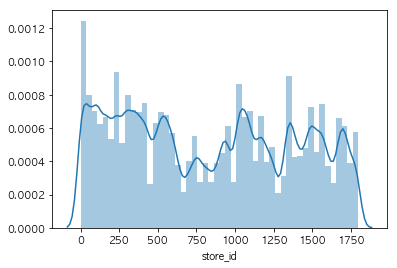

In [53]:
sns.distplot(train["store_id"])